# Section 24 - NLP 
> grouping news articles by topic 
> Example - 2 documents 
  - Blue house , Red house 
  - Featurize based on the word count 
    - Blue house -> (red, blue, house) -> (0,1,1)
    - Red house  -> (red, blue, house) -> (1,0,1)
  - Vector of word counts 
    - Bag of words 
  - use cosing similarity of vectors to determine the similarity of the documents 
  - Improve Bag of words by adjusting word counts based on their frequency in corpus (group of docs)
  - Use TF-IDF (Term frequency - Inverse document frequency )
    - Term frequency - refers to the importance of the term in the document 
      TF(d,t) - no of occurences of term t in document d 
    - Inverse doc frequency - refers to the importance of the term in the corpus 
      IDF(t) = log(D/t) - D = total no of docs , t= no of documents with the term 
  
  - Mathematically 
    - Wx,y = tfx,y * log(N/dfx) 
      tfx,y = frequency of x in y 
      dfx = no of docs containing x 
      N = total no of documents 
> UCI Machine learning dataset repository do refer it  https://archive.ics.uci.edu/ml/index.php 
  

In [1]:
# pip install nltk 

# import inbuilt data sets 
import nltk

In [3]:
nltk.download_shell()  # inbuilt nl shell 
# download d - stopwords corpus 
# q to quit the shell 

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\vravindran\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
# data cleaning 
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

# spam refers to the spam messages 
# ham refers to the normal messages 


In [13]:
print(type(messages))
print(messages[0:5])

<class 'list'>
['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'ham\tOk lar... Joking wif u oni...', "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'ham\tU dun say so early hor... U c already then say...', "ham\tNah I don't think he goes to usf, he lives around here though"]


In [15]:
# lets enumerate the message list(10 records) with numbers 
for mess_no, message in enumerate(iterable=messages[:10], start=0):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [16]:
messages[0]   # tab separated files 

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
import pandas as pd 

In [18]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['msglabel','message'])

In [19]:
messages.head()

,msglabel,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages.describe()

,msglabel,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
# Explore what separates a spam label and ham label 
messages.groupby(by='msglabel').describe()

message                                                            \
           count unique                                                top   
msglabel                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
msglabel       
ham        30  
spam        4

In [27]:
# create a new column length for the message column 
messages['length'] = messages['message'].apply(len)
messages.head()

,msglabel,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\vravindran\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


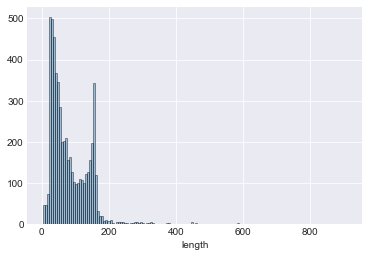

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')
sns.distplot(messages['length'],kde=False, hist_kws=dict(edgecolor='k',lw=1),bins=150)

In [34]:
messages['length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [39]:
# to find the lengthiest message 
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000177CF542198>,
      dtype=object)

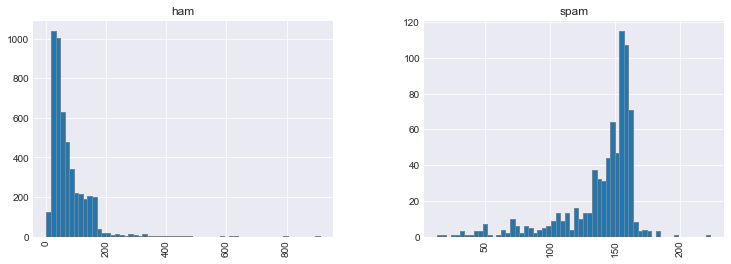

In [44]:
messages.hist(column='length',by='msglabel',bins=60,edgecolor='grey',lw=1,figsize=(12,4))
# xaxis denotes the length of the messages (ham , spam)
# ham message len in general around 50~
# spam message len in general around 150+~

# Part 2 

In [45]:
import string 

In [58]:
# featurise - remove stopwords, punctuations 

# removing punctuations 
print(string.punctuation)
mess = 'Sample message! Notice: it has punctuation.'

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [59]:
# removing punctuations 
nopunc = [c for c in mess if c not in string.punctuation]
nopunc
    

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [60]:
# make the characters into a single element 
nopunc = ''.join(nopunc)  # '++'.join(nopunc) joins ++ between each letter 
nopunc      # letters list converted into a list 

'Sample message Notice it has punctuation'

In [61]:
# removing stopwords 
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
# removing stopwords in the nopunc list 
print(nopunc.split())  # ['Hey', 'this', 'is', 'a', 'sample', 'message']
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print(clean_mess)   # removed stopwords it , has 

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']
['Sample', 'message', 'Notice', 'punctuation']


In [71]:
# Tokenisation - process of removing punctuation marks and stopwords in a message - cleaned version 

def text_process(mess):
    
#     remove punc 
#     make the char into single message 
#     remove stopwords 
#     return the cleaned message 
    nopunc = [char for char in mess if mess not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess =  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


In [72]:
# Apply this func on the dataframe 
messages['message'].head().apply(text_process)

0    [Go, jurong, point,, crazy.., Available, bugis...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor..., U, c, already, sa...
4      [Nah, think, goes, usf,, lives, around, though]
Name: message, dtype: object

In [73]:
# stemming - running, ran , run => run 

In [74]:
# Vectorisation - refer the lecture notebook 
from sklearn.feature_extraction.text import CountVectorizer 


In [76]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [77]:
print(len(bow_transformer.vocabulary_))

15333


In [78]:
# check on a single message record 
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [81]:
bow4 = bow_transformer.transform([mess4])


In [82]:
print(bow4) # => 8 unique words in message4 , refer the table in lecture notebook for better understanding 
# one word appears twice (0,5042)

  (0, 5042)	2
  (0, 5760)	1
  (0, 6635)	1
  (0, 7936)	1
  (0, 7963)	1
  (0, 9331)	1
  (0, 12680)	1
  (0, 12684)	1


In [84]:
print(bow4.shape)

(1, 15333)


In [88]:
# id the word that appears twice 
bow_transformer.get_feature_names()[5042]

'U'

# Part 3 

In [96]:
# Developing the sparse matrix 
bow_messages = bow_transformer.transform(messages['message'])

In [120]:
print('Shape of the sparse matrix', bow_messages.shape)     # 5572 rows(word count) x 15333 cols(messages)

Shape of the sparse matrix (5572, 15333)


In [98]:
# non zero occurences 
bow_messages.nnz

53364

In [100]:
# get the sparsity 
sparsity = (100.0 * bow_messages.nnz / (bow_messages.shape[0] * bow_messages.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.06246117245253014


In [101]:
# Implement TF IDF 
from sklearn.feature_extraction.text import TfidfTransformer

In [102]:
tfidf_transformer = TfidfTransformer().fit(bow_messages)

In [103]:
# Transform 4 th message 
tfidf4 = tfidf_transformer.transform(bow4)

In [104]:
print(tfidf4)

  (0, 12684)	0.4233059460411058
  (0, 12680)	0.2755291764174293
  (0, 9331)	0.4380858589249147
  (0, 7963)	0.33125276859338976
  (0, 7936)	0.298957460286238
  (0, 6635)	0.298957460286238
  (0, 5760)	0.2978282751277178
  (0, 5042)	0.4192795307561116


In [105]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [106]:
messages_tfidf = tfidf_transformer.transform(bow_messages)

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [108]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['msglabel'])

In [110]:
# predict using the model 
spam_detect_model.predict(tfidf4)[0]

'ham'

In [111]:
# predict all the messages in the df 
all_pred = spam_detect_model.predict(messages_tfidf)

In [113]:
all_pred

5572

In [114]:
# Forgot to train test split 
from sklearn.model_selection import train_test_split

In [115]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['msglabel'], 
                                                                test_size=0.3)

In [122]:
# Repeat the process above with msg_train data 
# Starting from vectorisation 
from sklearn.feature_extraction.text import CountVectorizer 

# transformer 
bow_transformer_traindata = CountVectorizer(analyzer=text_process).fit(msg_train)

print(len(bow_transformer_traindata.vocabulary_))   #12252

# apply transformer on the message train data 
bow_messages_traindata = bow_transformer_traindata.transform(msg_train)

print('Shape of the sparse matrix', bow_messages_traindata.shape) 


12252
Shape of the sparse matrix (3900, 12252)


In [118]:
# Repeat implementation of TF IDF 
from sklearn.feature_extraction.text import TfidfTransformer

12252

In [123]:
# TF IDF Transformer 
tfidf_transformer_traindata = TfidfTransformer().fit(bow_messages_traindata)

In [125]:
# transform the data 
tfidf_message_traindata = tfidf_transformer_traindata.transform(bow_messages_traindata)

In [126]:
# import the model 
from sklearn.naive_bayes import MultinomialNB

In [127]:
# fit the model 
spammsg_detect_model = MultinomialNB().fit(tfidf_message_traindata,label_train)

In [128]:
# predict using the model 
pred_naivebayes = spammsg_detect_model.predict(tfidf_message_traindata)

In [129]:
pred_naivebayes

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

# DATA PIPELINE FEATURE 

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
pipeline = Pipeline(steps=[
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [132]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000177D1EEFA60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [133]:
# prediction using pipeline 
predictions = pipeline.predict(msg_test)

In [134]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1440
        spam       1.00      0.62      0.77       232

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.94      1672



In [137]:
# using another model in the pipeline 
from sklearn.ensemble import RandomForestClassifier


In [138]:
pipeline_Rf = Pipeline(steps=[
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',RandomForestClassifier())]
    )

In [139]:
pipeline_Rf.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000177D1EEFA60>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [140]:
predictions_Rf = pipeline_Rf.predict(msg_test)

In [141]:
print(classification_report(label_test,predictions_Rf))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1440
        spam       0.99      0.71      0.83       232

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

